[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pidipidi/CS470_IAI_2024_Fall/blob/main/tutorial_1/cs470_tutorial_1_3.ipynb)

# **CS470 Deep Learning Tutorial**
* Google Collab Tutorial (How to use)  
* DL Tutorial with Numpy  
* **DL Tutorial with PyTorch**

    


## **3. DL Tutorial with PyTorch**

In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [2]:
# ================================================================== #
#                    1. Basic autograd example 1                     #
# ================================================================== #
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
# required _grad explaination verbally

# Create tensors directly from data

data = [[9, 8],[7, 2]]
x_data = torch.tensor(data)
# Create tensors directly from numpy arrays

np_array = np.array(data)
x_np = torch.from_numpy(np_array)
# Build a computational graph.
y = w * x + b    # y = 2 * x + 3
print(y)

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2
print(w.grad)    # w.grad = 1
print(b.grad)    # b.grad = 1


tensor(5., grad_fn=<AddBackward0>)
tensor(2.)
tensor(1.)
tensor(1.)


In [3]:
# ================================================================== #
#                    2. Basic autograd example 2                     #
# ================================================================== #
x = torch.randn(10, 3)
y = torch.randn(10, 2)
# Build a fully connected layer.
linear = nn.Linear(3, 2)
print('w: ', linear.weight)
print('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print('dL/dw: ', linear.weight.grad)
print('dL/db: ', linear.bias.grad)


# Print out the loss after 1-step gradient descent.
optimizer.step()
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[ 0.1609, -0.2991, -0.2692],
        [-0.2899, -0.2206,  0.3560]], requires_grad=True)
b:  Parameter containing:
tensor([-0.3091,  0.1367], requires_grad=True)
loss:  1.2980421781539917
dL/dw:  tensor([[ 3.9550e-01, -1.8530e-01, -1.3876e+00],
        [-3.3018e-01,  2.2192e-04,  6.7973e-01]])
dL/db:  tensor([-0.4203,  0.6163])
loss after 1 step optimization:  1.2659823894500732


In [4]:

# ================================================================== #
#                         3. Input pipeline                           #
# ================================================================== #

# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print(image.size())
print(label)

# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = next(data_iter)

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass

100%|██████████| 170498071/170498071 [00:03<00:00, 48090713.58it/s]


Extracting ../../data/cifar-10-python.tar.gz to ../../data/
torch.Size([3, 32, 32])
6


In [5]:
# ================================================================== #
#                        4. Pretrained model                         #
# ================================================================== #

# Download and load the pretrained densenet.
model = torchvision.models.resnet18(pretrained=True)
# If you want to finetune only the top layer of the model, set as below.
for param in model.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
model.fc = nn.Linear(model.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = model(images)
print (outputs.size())     # (64, 100)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 152MB/s]


torch.Size([64, 100])


In [6]:
# ================================================================== #
#                      5. Save and load the model                    #
# ================================================================== #

# Save and load the entire model.
torch.save(model, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(model.state_dict(), 'params.ckpt')
model.load_state_dict(torch.load('params.ckpt'))

<ipython-input-6-7dea3e05de5b>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('model.ckpt')
<ipython-input-6-7dea3e05de5b>:11: FutureWarning: You are us

<All keys matched successfully>

Epoch [5/60], Loss: 20.8474
Epoch [10/60], Loss: 8.6198
Epoch [15/60], Loss: 3.6660
Epoch [20/60], Loss: 1.6590
Epoch [25/60], Loss: 0.8457
Epoch [30/60], Loss: 0.5161
Epoch [35/60], Loss: 0.3823
Epoch [40/60], Loss: 0.3280
Epoch [45/60], Loss: 0.3058
Epoch [50/60], Loss: 0.2966
Epoch [55/60], Loss: 0.2927
Epoch [60/60], Loss: 0.2909


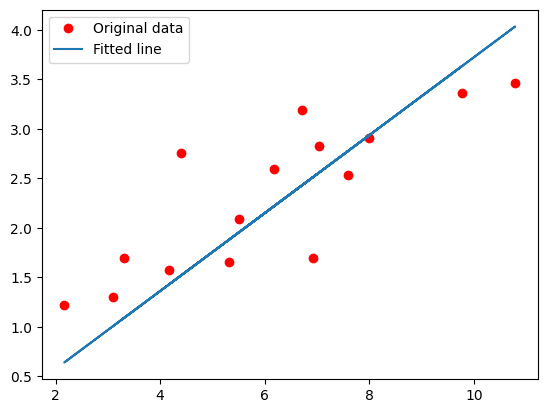

In [7]:
# ================================================================== #
#                      6. Linear Regression                          #
# ================================================================== #
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')